In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sf-booking/hotels_test.csv
/kaggle/input/sf-booking/hotels_train.csv
/kaggle/input/sf-booking/submission.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
#!pip freeze > requirements.txt

## Загружаем данные

In [4]:
# Подгрузим наши данные из соревнования

# DATA_DIR = 'data'
# df_train = pd.read_csv(DATA_DIR+'/hotels_train.csv') # датасет для обучения
# df_test = pd.read_csv(DATA_DIR+'/hotels_test.csv') # датасет для предсказания
# sample_submission = pd.read_csv(DATA_DIR+'/submission.csv') # самбмишн

DATA_DIR = '/kaggle/input/sf-booking/'
df_train = pd.read_csv(DATA_DIR+'/hotels_train.csv') # датасет для обучения
df_test = pd.read_csv(DATA_DIR+'hotels_test.csv') # датасет для предсказания
sample_submission = pd.read_csv(DATA_DIR+'/submission.csv') # самбмишн

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [6]:
df_train.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [8]:
df_test.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443


In [9]:
sample_submission.head(2)

,reviewer_score,id
0,1,488440
1,10,274649


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   reviewer_score  128935 non-null  int64
 1   id              128935 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


In [11]:
# Дkя корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['reviewer_score'] = 0 # в тесте у нас нет значения reviewer_score, 
# мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

## Извлечем полезную информацию из признаков

Узнаем самые распростарненные отзывы

In [12]:
data['negative_review'].value_counts()[:20]

No Negative         127890
 Nothing             14295
 Nothing              4236
 nothing              2225
 N A                  1037
 None                  984
                       849
 N a                   509
 Breakfast             407
 Small room            373
 Location              368
 Everything            326
 All good              318
 Nothing really        316
 none                  302
 nothing               283
 No complaints         274
 Price                 260
 Nothing really        254
 Nil                   247
Name: negative_review, dtype: int64

Добавим признак отсутствия негативного отзыва

In [13]:
no_neg_list = list(data['negative_review'].value_counts()[:8].index)
no_neg_list


['No Negative',
 ' Nothing',
 ' Nothing ',
 ' nothing',
 ' N A',
 ' None',
 ' ',
 ' N a']

In [14]:
data['no_neg'] = data['negative_review'].apply(
    lambda x: 1 if x in no_neg_list else 0)

Узнаем самые распространенные позитивные отзывы

In [15]:
data['positive_review'].value_counts()[:20]

No Positive            35946
 Location               9222
 Everything             2284
 location               1677
 Nothing                1243
 The location           1126
 Great location         1047
 Good location           927
 Location                915
 Everything              613
 Breakfast               608
 Friendly staff          515
 Staff                   453
 Excellent location      392
 Great location          372
 Location and staff      333
 everything              319
 Good location           276
 Nothing                 225
 Comfy bed               222
Name: positive_review, dtype: int64

Добавим признак отсутствия позитивного отзыва

In [16]:
data['no_pos'] = data['positive_review'].apply(
    lambda x: 1 if 'No Positive' in x else 0)

Присвоим каждому отелю свой индекс

In [17]:
hotel_names = data['hotel_name'].unique()
hotel_indexes = list(range(len(hotel_names)))

hotel_names_dict = dict()
for hotel_name, index in zip(hotel_names, range(len(hotel_names))):
    hotel_names_dict[hotel_name] =  index

In [18]:
data['hotel_index'] = data['hotel_name'].apply(
    lambda x: hotel_names_dict[x])

Преобразуем признак количества дней между датой проверки и датой очистки в числовой

In [19]:
data['days_since_review'] = data['days_since_review'].apply(
    lambda x: int(x.split()[0]))

Добавим информацию о городе

In [20]:
data['city'] = data['hotel_address'].apply(
    lambda x: str(x.split()[-5]) if 'Kingdom' in x else str(x.split()[-2]))

In [21]:
data.city.value_counts()

London       262301
Barcelona     60149
Paris         59928
Amsterdam     57214
Vienna        38939
Milan         37207
Name: city, dtype: int64

Создадим бинарные признаки по городу

In [22]:
data = pd.get_dummies(data, columns=['city'])

Выделим самые распрстраненные национальности

In [23]:
rev_nat_list = list(data['reviewer_nationality'].value_counts().index[:20])

rev_nat_list


[' United Kingdom ',
 ' United States of America ',
 ' Australia ',
 ' Ireland ',
 ' United Arab Emirates ',
 ' Saudi Arabia ',
 ' Netherlands ',
 ' Switzerland ',
 ' Germany ',
 ' Canada ',
 ' France ',
 ' Israel ',
 ' Italy ',
 ' Belgium ',
 ' Turkey ',
 ' Kuwait ',
 ' Spain ',
 ' Romania ',
 ' Russia ',
 ' South Africa ']

In [24]:
data['reviewer_nationality'] = data['reviewer_nationality'].apply(
    lambda x: x if x in rev_nat_list else 'Other')
data['reviewer_nationality'].unique()

array([' United Kingdom ', ' Belgium ', 'Other',
       ' United States of America ', ' Netherlands ', ' Ireland ',
       ' Canada ', ' Italy ', ' Australia ', ' Kuwait ', ' Saudi Arabia ',
       ' France ', ' Germany ', ' South Africa ',
       ' United Arab Emirates ', ' Spain ', ' Switzerland ', ' Turkey ',
       ' Israel ', ' Romania ', ' Russia '], dtype=object)

Создадим бинарный признак по национальности

In [25]:
data = pd.get_dummies(data, columns=['reviewer_nationality'])

Соберем тэги в списки

In [26]:
# Функция преобразования данных с тэгами в список
def get_tags(tags):

    tags_list = tags.replace("['",'').replace("']", '').replace("'",'').split(
        sep = ', ')
    for i in range(len(tags_list)):
        tags_list[i] = tags_list[i][1:-1]

    return tags_list

In [27]:
data['tags'] = data['tags'].apply(get_tags)

Найдем самые популярные тэги

In [28]:
# Соберем все тэги в список
tags = []

data['tags'].apply(lambda x: tags.extend(x))

tags_dict = {}

# Посчитаем тэги в словаре
for tag in tags:
    if tag not in tags_dict:
        tags_dict[tag] = 1
    else:
        tags_dict[tag] += 1
        
# Преобразуем данные в датафрейм и отсортируем по убыванию количества повторений      
tags_data = pd.DataFrame({'tag':tags_dict.keys(), 'cnt':tags_dict.values()})
tags_data = tags_data.sort_values(by='cnt', ascending=False, ignore_index=True)
display(tags_data.head(10))      



,tag,cnt
0,Leisure trip,417778
1,Submitted from a mobile device,307640
2,Couple,252294
3,Stayed 1 night,193645
4,Stayed 2 nights,133937
5,Solo traveler,108545
6,Stayed 3 nights,95821
7,Business trip,82939
8,Group,65392
9,Family with young children,61015


In [29]:
# Соберем самые популярные тэги в список
top_tag = list(tags_data[:20]['tag'])

top_tag

['Leisure trip',
 'Submitted from a mobile device',
 'Couple',
 'Stayed 1 night',
 'Stayed 2 nights',
 'Solo traveler',
 'Stayed 3 nights',
 'Business trip',
 'Group',
 'Family with young children',
 'Stayed 4 nights',
 'Double Room',
 'Standard Double Room',
 'Superior Double Room',
 'Family with older children',
 'Deluxe Double Room',
 'Double or Twin Room',
 'Stayed 5 nights',
 'Standard Double or Twin Room',
 'Classic Double Room']

Создадим бинарные признаки по самым популярным тэгам

In [30]:
for tag in top_tag:
    data[tag] = data['tags'].apply(lambda x: 1 if tag in x else 0)

Создадим признак соотношения количества слов позитивнных отзывов к общему числу слов всех отзывов

In [31]:
data['pos_word_prop'] = data['review_total_negative_word_counts'] / (
    data['review_total_negative_word_counts'] + 
    data['review_total_positive_word_counts']) * 100

Создадим признак соотношения количества слов позитивнных отзывов к общему числу слов всех отзывов

In [32]:
data['pos_word_prop'] = data['review_total_negative_word_counts'] / (
    data['review_total_negative_word_counts'] + 
    data['review_total_positive_word_counts']) * 100

Добавим признак номера месяца

In [33]:
data['review_date'] = pd.to_datetime(data['review_date'])
data['month'] = data['review_date'].dt.month

Определим тональность отзывов

In [34]:
# Импортируем анализатор тональности текста
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


True

In [35]:
# Определим тональность отзывов
data['neg_review_sent'] = data['negative_review'].apply(
    lambda x: SentimentIntensityAnalyzer().polarity_scores(x))
data['positive_review_sent'] = data['positive_review'].apply(
    lambda x: SentimentIntensityAnalyzer().polarity_scores(x))

Создадим отдельные признаки тональности отзывов

In [36]:
data.loc[:,['n_neg', 'n_neu', 'n_pos', 'n_compound']] = list(
    data['neg_review_sent'].apply(
        lambda x: [x['neg'], x['neu'], x['pos'], x['compound']]).values)
data.loc[:,['p_neg', 'p_neu', 'p_pos', 'p_compound']] = list(
    data['positive_review_sent'].apply(
        lambda x: [x['neg'], x['neu'], x['pos'], x['compound']]).values)

Заполняем пропуски

In [37]:
data['lat'].fillna(data['lat'].median(), inplace=True)
data['lng'].fillna(data['lng'].median(), inplace=True)
data['pos_word_prop'].fillna(data['pos_word_prop'].median(), inplace=True)

In [38]:
data.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,...,neg_review_sent,positive_review_sent,n_neg,n_neu,n_pos,n_compound,p_neg,p_neu,p_pos,p_compound
0,Via Senigallia 6 20161 Milan Italy,904,2017-07-21,8.1,Hotel Da Vinci,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,...,"{'neg': 0.129, 'neu': 0.747, 'pos': 0.125, 'co...","{'neg': 0.0, 'neu': 0.671, 'pos': 0.329, 'comp...",0.129,0.747,0.125,-0.0554,0.000,0.671,0.329,0.9615
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,2016-12-12,8.6,Urban Lodge Hotel,No tissue paper box was present at the room,10,5018,No Positive,0,...,"{'neg': 0.216, 'neu': 0.784, 'pos': 0.0, 'comp...","{'neg': 0.379, 'neu': 0.0, 'pos': 0.621, 'comp...",0.216,0.784,0.000,-0.2960,0.379,0.000,0.621,0.3400
2,Mallorca 251 Eixample 08008 Barcelona Spain,46,2015-11-26,8.3,Alexandra Barcelona A DoubleTree by Hilton,Pillows,3,351,Nice welcoming and service,5,...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 0.26, 'pos': 0.74, 'compou...",0.000,1.000,0.000,0.0000,0.000,0.260,0.740,0.6908
3,Piazza Della Repubblica 17 Central Station 201...,241,2015-10-17,9.1,Hotel Principe Di Savoia,No Negative,0,1543,Everything including the nice upgrade The Hot...,27,...,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 0.621, 'pos': 0.379, 'comp...",1.000,0.000,0.000,-0.7096,0.000,0.621,0.379,0.9153
4,Singel 303 309 Amsterdam City Center 1012 WJ A...,834,2016-05-16,9.1,Hotel Esther a,No Negative,0,4687,Lovely hotel v welcoming staff,7,...,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 0.23, 'pos': 0.77, 'compou...",1.000,0.000,0.000,-0.7096,0.000,0.230,0.770,0.7717


In [39]:
data_sent = data

## Удалим признаки, вызывающие мультиколлинеарность

Сразу выделим эти признаки

<AxesSubplot:>

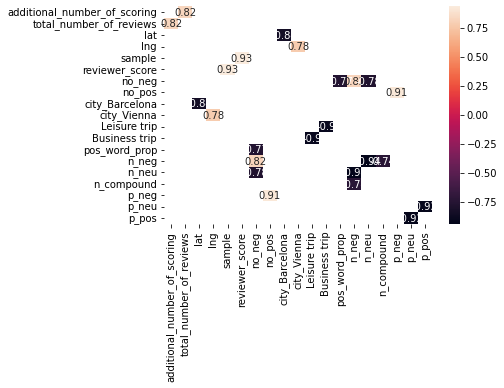

In [40]:
corr_data = data_sent.corr()
corr_data

for col in corr_data:
    corr_data[col] = corr_data[col].apply(lambda x: np.nan if (abs(x) < 0.7 or x == 1) else x)
for col in corr_data:
    corr_data = corr_data.dropna(how='all')
    corr_data = corr_data.dropna(how='all', axis='columns')
    
#plt.rcParams['figure.figsize'] = (24,24)
sns.heatmap(corr_data, annot=True)

Удалим признаки, вызывающие мультиколлинеарность

In [41]:
# finish drop
data_droped = data_sent.drop(labels=['city_Barcelona','city_Vienna','Business trip', 'additional_number_of_scoring','no_neg','n_neg', 'p_neu', 'no_pos'], axis=1)


In [42]:
data = data_droped

<AxesSubplot:>

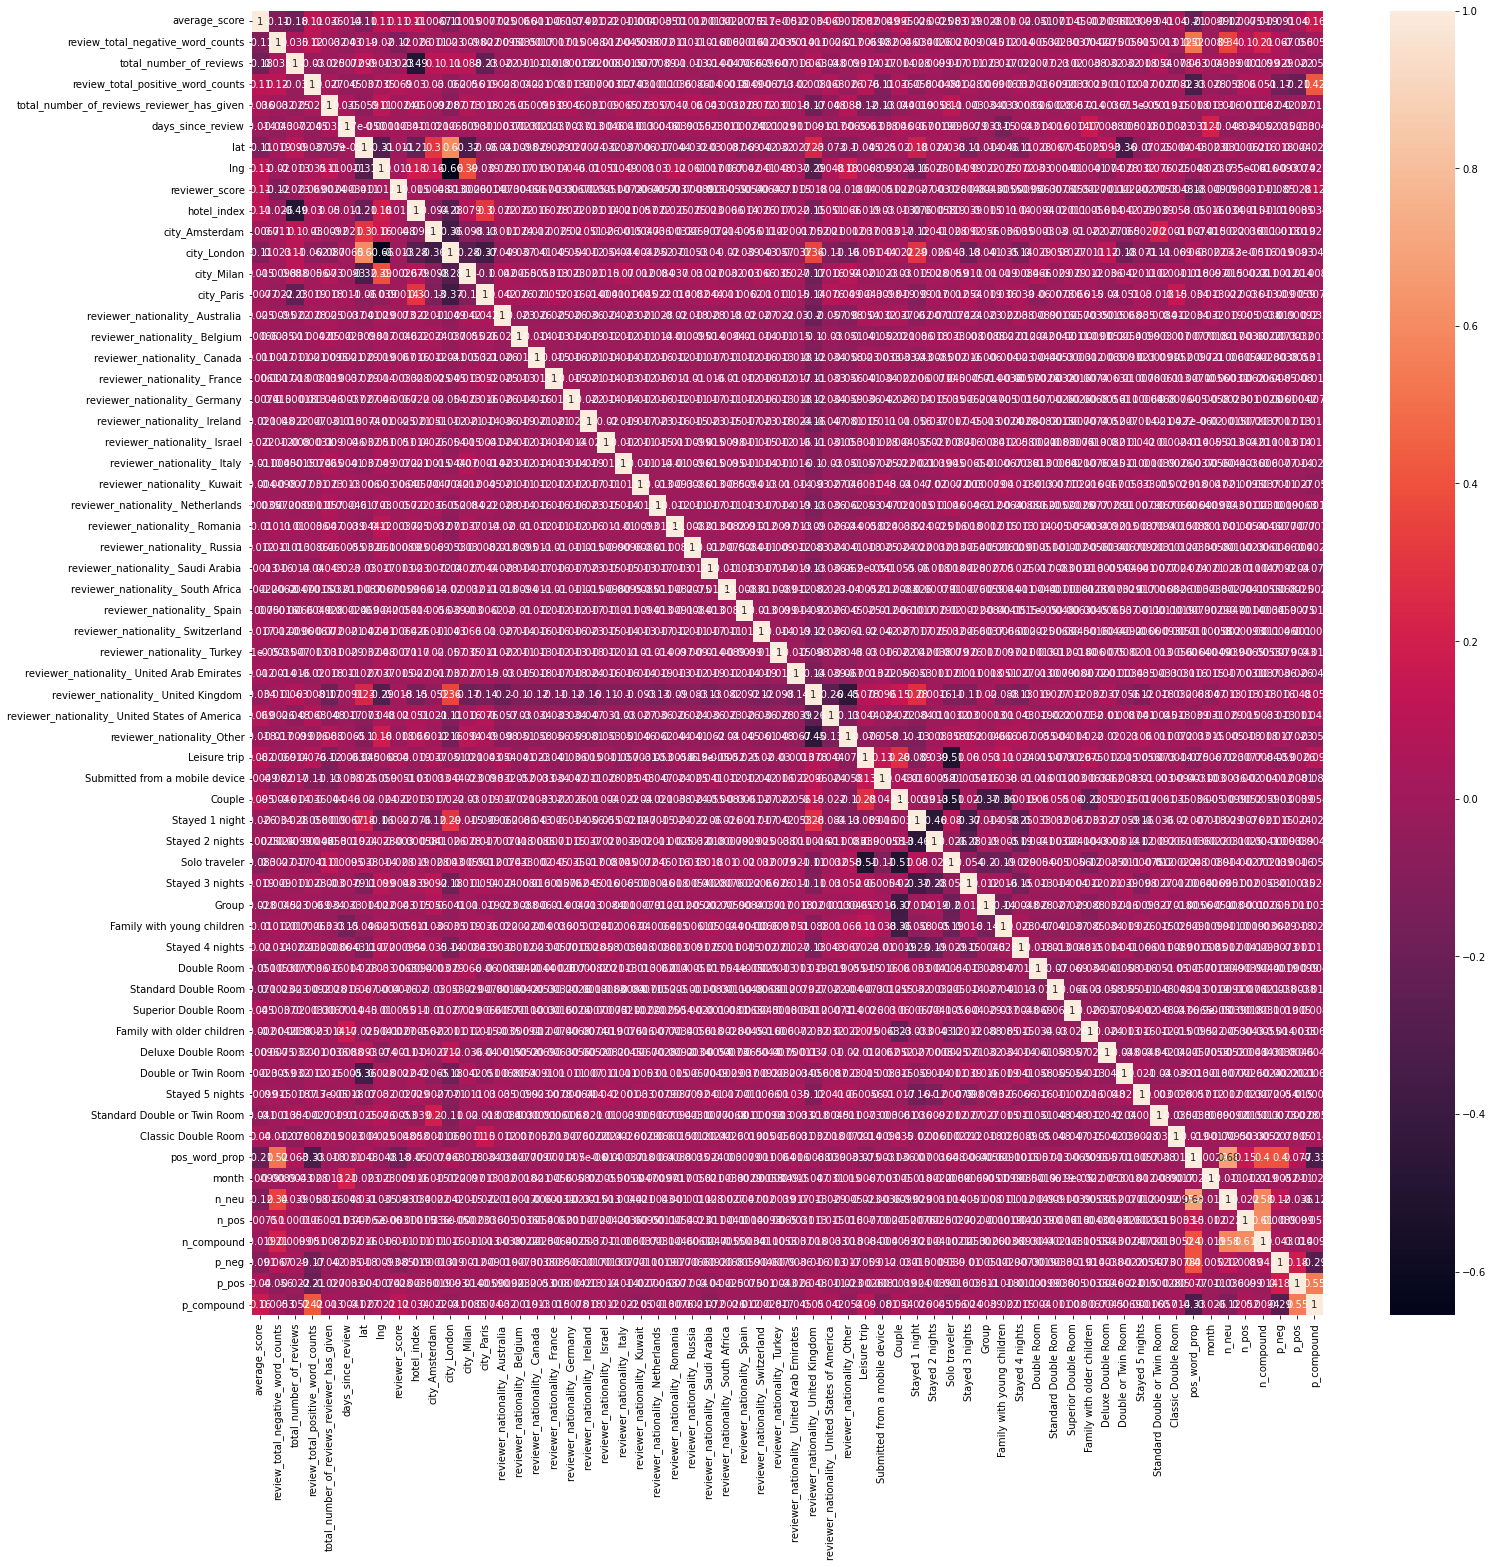

In [43]:
plt.rcParams['figure.figsize'] = (24,24)
sns.heatmap(data.drop(['sample'], axis=1).corr(), annot=True)

In [52]:
# убираем признаки которые еще не успели обработать, 
# модель на признаках с dtypes "object" обучаться не будет, выберим их и удалим
object_columns = [s for s in data.columns if data[s].dtypes == 'object']
data.drop(object_columns, axis = 1, inplace=True)
# Удалим признак с датой
data.drop(['review_date'], axis=1, inplace=True)


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 63 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   average_score                                    515738 non-null  float64
 1   review_total_negative_word_counts                515738 non-null  int64  
 2   total_number_of_reviews                          515738 non-null  int64  
 3   review_total_positive_word_counts                515738 non-null  int64  
 4   total_number_of_reviews_reviewer_has_given       515738 non-null  int64  
 5   days_since_review                                515738 non-null  int64  
 6   lat                                              515738 non-null  float64
 7   lng                                              515738 non-null  float64
 8   sample                                           515738 non-null  int64  
 9   reviewer_score 

In [54]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)

In [55]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_SEED)

In [56]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((128935, 62), (386803, 62), (386803, 61), (309442, 61), (77361, 61))

## Обучение модели

In [57]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [58]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(
    n_estimators=100, 
    verbose=1, n_jobs=-1, 
    random_state=RANDOM_SEED
    )

In [59]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.2s finished


In [60]:
# Пишем свою функцию Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

MAE: 0.8775278559825578
MAPE: 12.540343507429913


<AxesSubplot:>

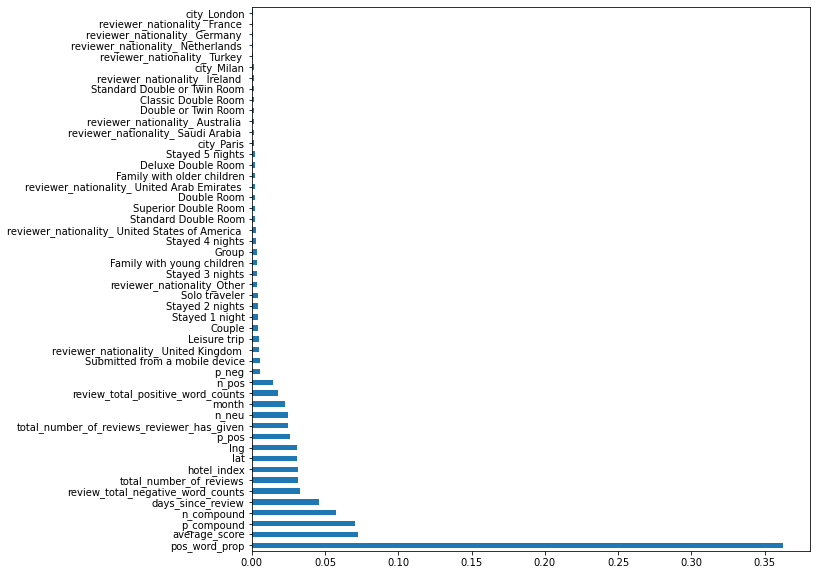

In [66]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(50).plot(kind='barh')

In [ ]:
test_data = test_data.drop(['reviewer_score'], axis=1)

In [67]:
sample_submission

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596
...,...,...
128930,7,495812
128931,1,315577
128932,3,511968
128933,6,303386


In [68]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.9s finished


In [69]:
predict_submission

array([8.59 , 7.548, 8.256, ..., 8.254, 9.588, 7.42 ])

In [70]:
list(sample_submission)

['reviewer_score', 'id']

In [71]:
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,reviewer_score,id
0,8.590,488440
1,7.548,274649
2,8.256,374688
3,9.548,404352
4,9.595,451596
5,8.737,302161
6,7.632,317079
7,7.446,13963
8,8.475,159785
9,7.134,195089
